In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import decomposition
from sklearn.linear_model import RidgeCV
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
# import os
# print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')

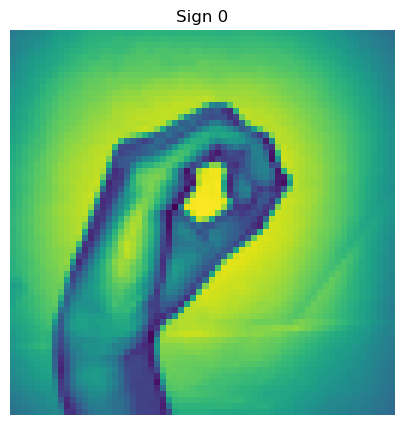

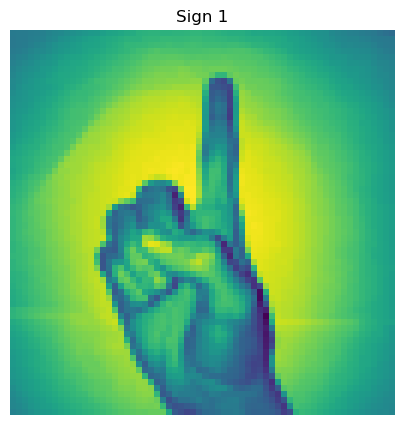

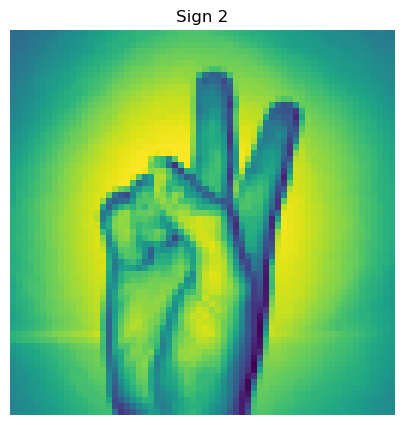

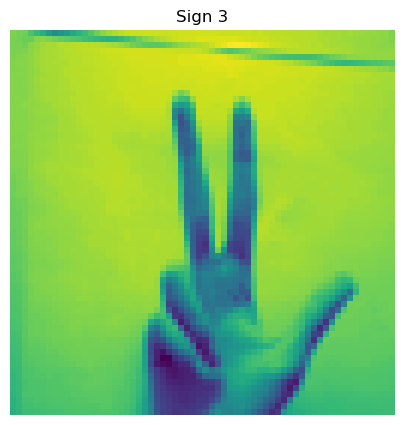

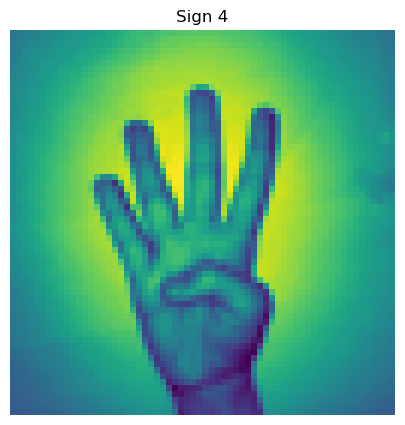

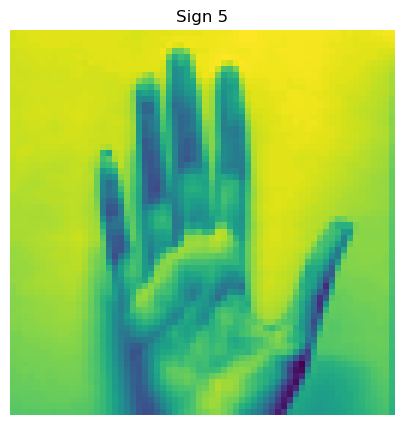

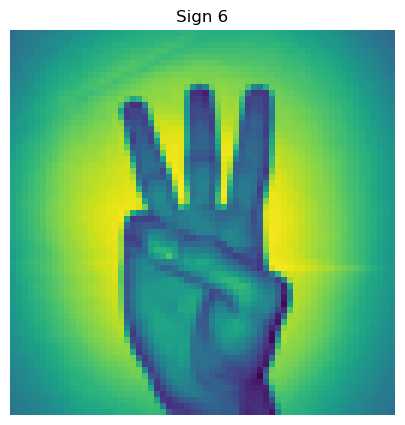

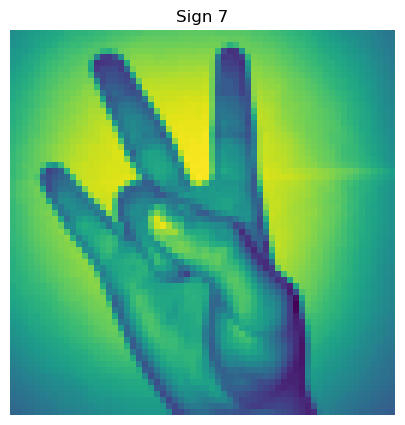

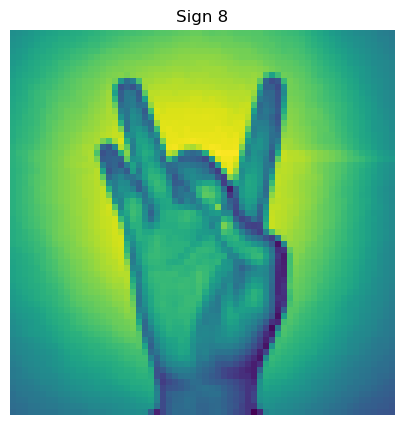

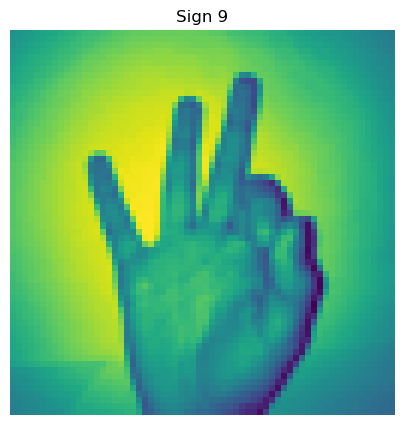

In [3]:
# load data set
x_load = np.load("D:\downloads\X.npy")
y_load = np.load("D:\downloads\Y.npy")
img_size = 64

# one sample from each digits
image_index_list = [260,900,1800,1600,1400,2061,700,500,1111,100]
for each in range(10):
    plt.figure(figsize=(8,5))
    plt.imshow(x_load[image_index_list[each]].reshape(img_size, img_size))
    plt.axis('off')
    title = "Sign " + str(each) 
    plt.title(title)
plt.show()

In [11]:
X = x_load.reshape((len(x_load), -1)) 
train = X
test = X[image_index_list]
n_pixels = X.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
X_test = test[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
y_test = test[:, n_pixels // 2:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2062, 2048)
(2062, 2048)
(10, 2048)
(10, 2048)


In [17]:
# Fit estimators
estimator = RidgeCV()
start = time.time()   # returns in second
estimator.fit(X_train, y_train)
end = time.time()
print("Training time is "+ str(end - start) + " second.")
start = time.time()   # returns in second
y_test_predict = estimator.predict(X_test)
end = time.time()
print("Prediction time is "+ str(end - start) + " second.")

Training time is 7.604369401931763 second.
Prediction time is 0.006539344787597656 second.


In [18]:
# Plot the completed faces
image_shape = (64, 64)
n_faces = 10
n_cols = 1

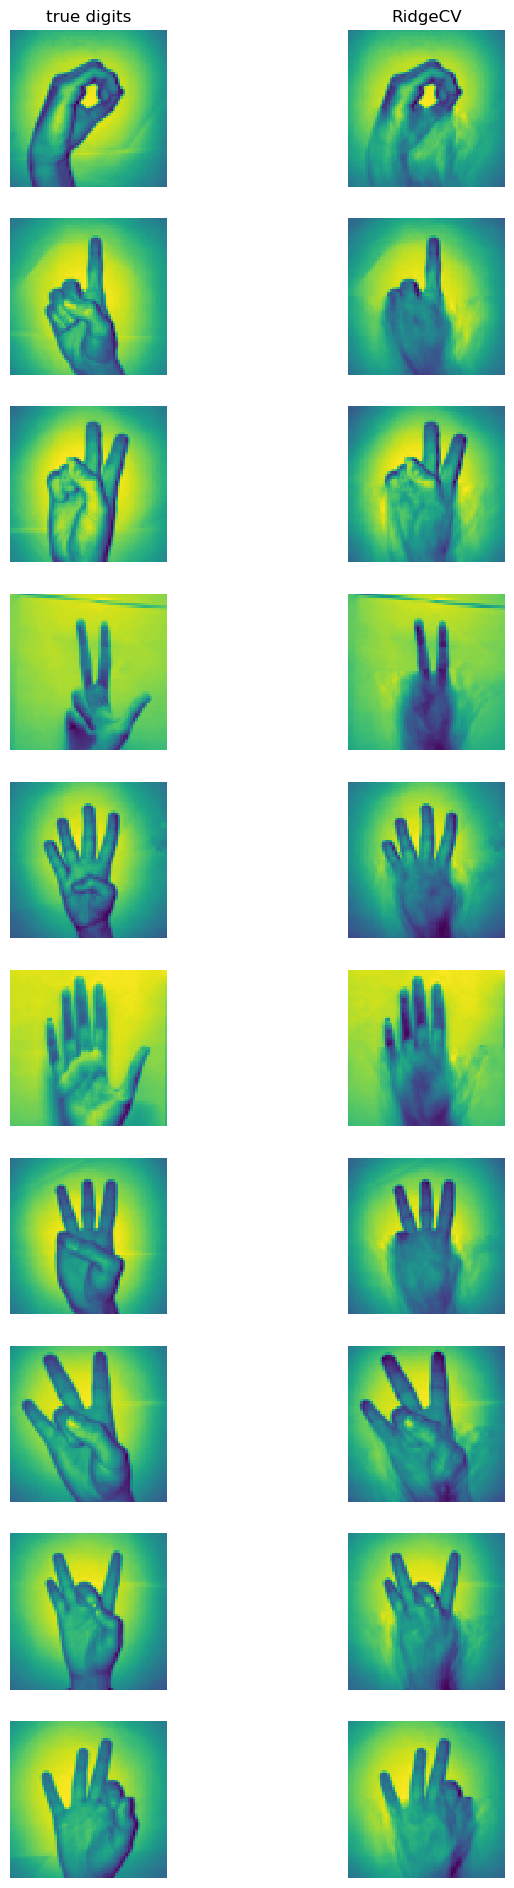

In [23]:
# Plot the completed faces
image_shape = (64, 64)
plt.figure(figsize=(8, 24))
for i in range(10):
    true_digits = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(10, 2, i * 2 + 1)
    else:
        sub = plt.subplot(10, 2, i * 2 + 1, title="true digits")
    
    sub.imshow(true_digits.reshape(image_shape),interpolation="nearest")
    sub.axis("off")
    completed_digits = np.hstack((X_test[i], y_test_predict[i]))

    if i:
        sub = plt.subplot(10, 2, i * 2 + 2 )

    else:
        sub = plt.subplot(10, 2, i * 2 + 2,title="RidgeCV")

    sub.imshow(completed_digits.reshape(image_shape),interpolation="nearest")
    sub.axis("off")

plt.show()

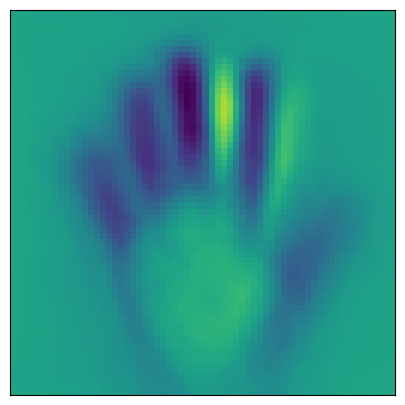

In [28]:
n_components = 5
(n_samples, n_features) = X.shape
estimator = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True)
estimator.fit(X)
components_ = estimator.components_
images = components_[:n_components]
plt.figure(figsize=(6, 5))
for i, comp in enumerate(images):
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
plt.savefig('graph.png')
plt.show()